### Import Libraries

In [41]:
#-*- coding: utf-8 -*-#

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
np.random.seed(8)

# Matplotlib and seaborn for plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.size'] = 24
matplotlib.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

import seaborn as sns

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [42]:
#set working directory
df = pd.read_csv("customer_location_df.txt", sep='|')

In [43]:
df.shape

(791776, 26)

### Select Column

In [45]:
df = df[(df['GOO_COUNTRY_CODE']=='Hong Kong') & (df['PLC_STATUS']=='有效')]
df = df.loc[:,['GOO_LATITUDE','GOO_LONGITUDE']]

### Check Missing Data

In [46]:
def check_missing_data(df):
    # missing data
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data.head(20))

In [47]:
check_missing_data(df)

               Total  Percent
GOO_LONGITUDE      0      0.0
GOO_LATITUDE       0      0.0


In [48]:
df = df.dropna()

In [49]:
df.describe()

,GOO_LATITUDE,GOO_LONGITUDE
count,281878.000000,281878.000000
mean,22.351708,114.150927
std,0.088876,0.338782
min,0.000000,0.000000
25%,22.305566,114.126470
50%,22.339085,114.171850
75%,22.388099,114.213265
max,28.647890,180.000000


In [50]:
df.head()

,GOO_LATITUDE,GOO_LONGITUDE
2,22.424867,114.233813
9,22.344887,114.194359
21,22.342677,114.166749
24,22.380442,114.172922
27,22.380882,114.199901


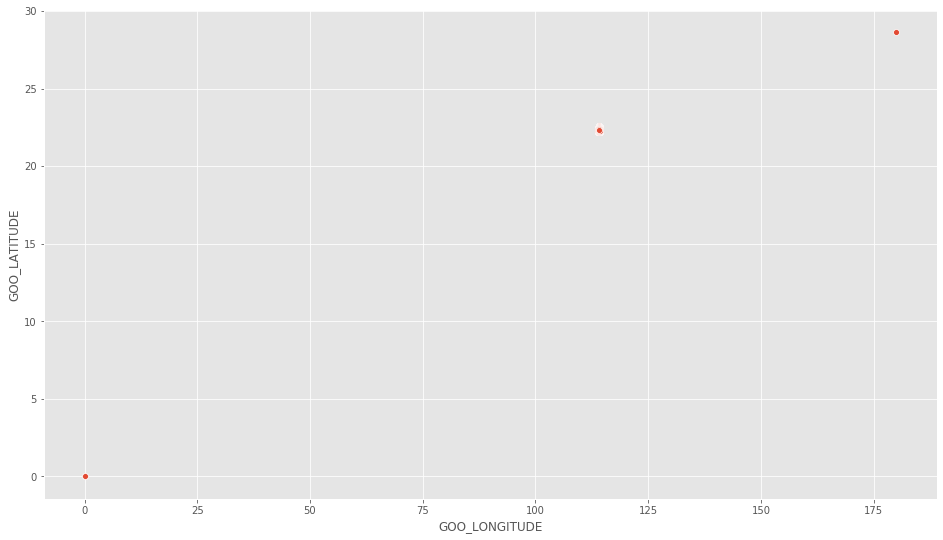

In [51]:
ax = sns.scatterplot(x="GOO_LONGITUDE", y="GOO_LATITUDE", data=df)

### Outliner 

In [52]:
df.loc[df['GOO_LATITUDE'] < 22] 

,GOO_LATITUDE,GOO_LONGITUDE
403267,0.0,0.0
790967,0.0,0.0


In [53]:
df.loc[df['GOO_LONGITUDE'] > 115] 

,GOO_LATITUDE,GOO_LONGITUDE
519918,28.64789,180.0


### Update the GOO_LATITUDE, GOO_LONGITUDE for Outliner

In [54]:
#403267 22.4303384,114.0891702
#790967 22.3445576,114.1882836
#519918 22.3975032,113.9760157

df.GOO_LATITUDE.loc[[403267]] = 22.4303384
df.GOO_LONGITUDE.loc[[403267]] = 114.0891702
df.GOO_LATITUDE.loc[[790967]] = 22.3445576
df.GOO_LONGITUDE.loc[[790967]] = 114.1882836
df.GOO_LATITUDE.loc[[519918]] = 22.3975032
df.GOO_LONGITUDE.loc[[519918]] = 113.9760157

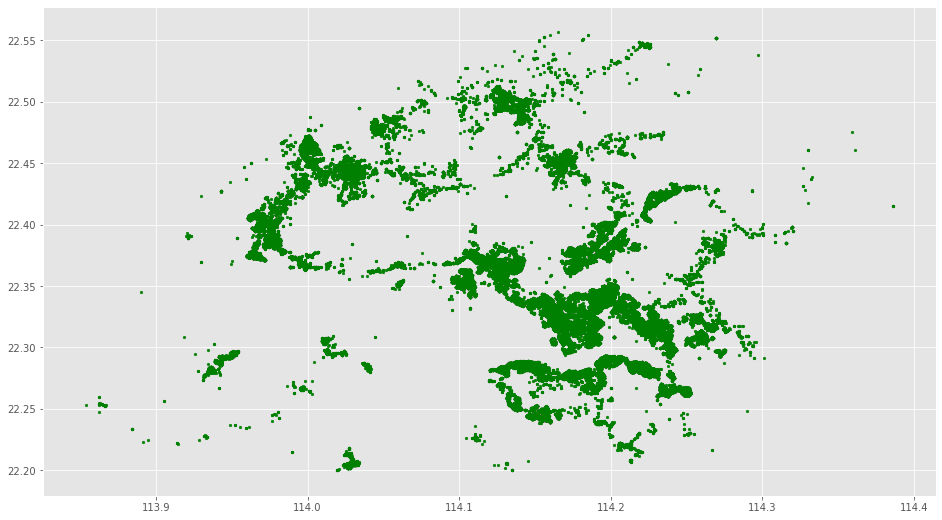

In [55]:
plt.scatter(df['GOO_LONGITUDE'], df['GOO_LATITUDE'], c='green', s=7)

### The Elbow Method

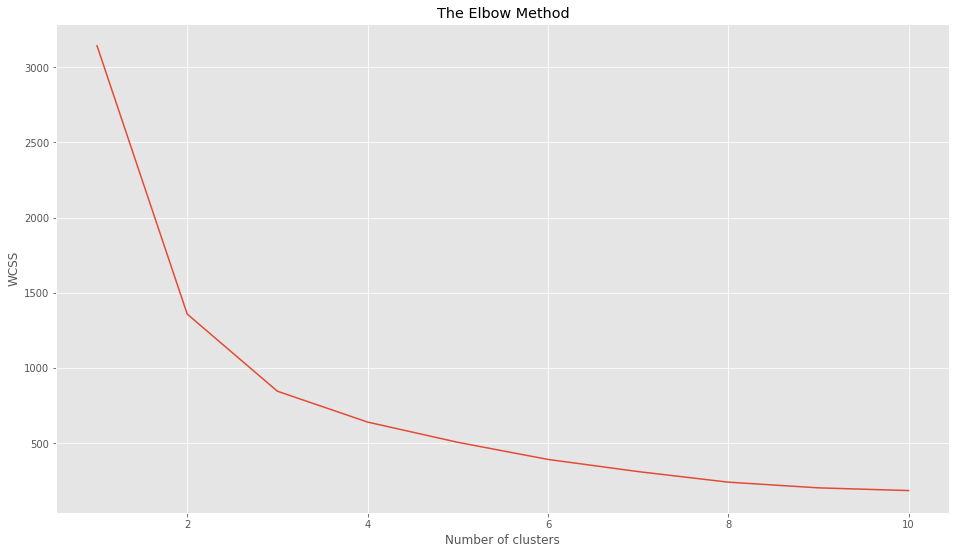

In [56]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    wcss.append (kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Applying k-means to the dataset

In [57]:
Kmean = KMeans(n_clusters=4)
Kmean.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [58]:
Kmean.cluster_centers_

array([[ 22.43797896, 114.18428292],
       [ 22.30146589, 114.21442467],
       [ 22.4148498 , 113.99272852],
       [ 22.33590727, 114.14365898]])

In [59]:
c1 = (114.18428292, 22.43797896)
c2 = (114.21442467, 22.30146589)
c3 = (113.99272852, 22.4148498)
c4 = (114.14365898, 22.33590727)

In [60]:
def calculate_distance(centroid, X, Y):
    distances = []
        
    # Unpack the x and y coordinates of the centroid
    c_x, c_y = centroid
        
    # Iterate over the data points and calculate the distance using the           # given formula
    for x, y in list(zip(X, Y)):
        root_diff_x = (x - c_x) ** 2
        root_diff_y = (y - c_y) ** 2
        distance = np.sqrt(root_diff_x + root_diff_y)
        distances.append(distance)
        
    return distances

In [61]:
# Calculate the distance and assign them to the DataFrame accordingly
df['C1_Distance'] = calculate_distance(c1, df['GOO_LONGITUDE'], df['GOO_LATITUDE'])
df['C2_Distance'] = calculate_distance(c2, df['GOO_LONGITUDE'], df['GOO_LATITUDE'])
df['C3_Distance'] = calculate_distance(c3, df['GOO_LONGITUDE'], df['GOO_LATITUDE'])
df['C4_Distance'] = calculate_distance(c4, df['GOO_LONGITUDE'], df['GOO_LATITUDE'])

In [62]:
# Get the minimum distance centroids
df['Cluster'] = df[['C1_Distance', 'C2_Distance', 'C3_Distance', 'C4_Distance']].apply(np.argmin, axis =1)
df['Cluster'] = df['Cluster'].map({'C1_Distance': 'C1', 'C2_Distance': 'C2', 'C3_Distance': 'C3', 'C4_Distance': 'C4'})

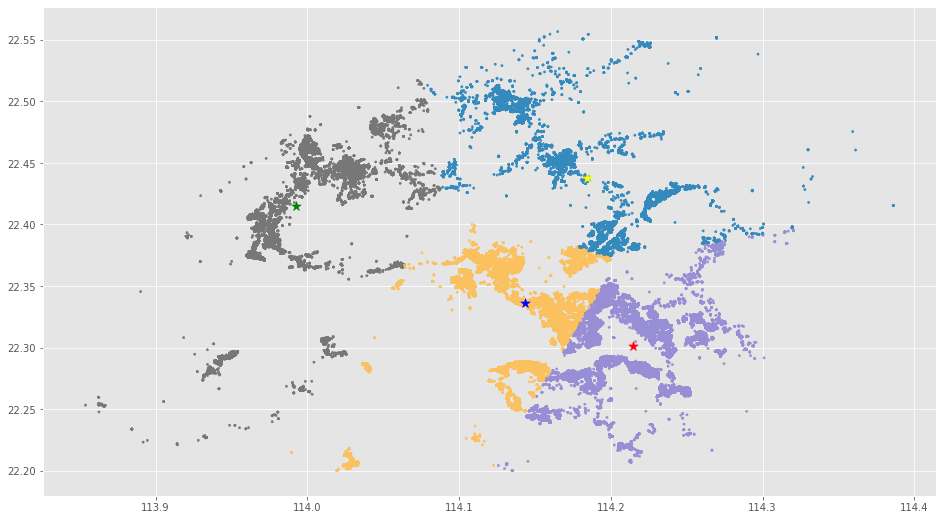

In [64]:
plt.scatter(df['GOO_LONGITUDE'], df['GOO_LATITUDE'], c=df['Cluster'], s=5)
plt.scatter(c1[0], c1[1], marker='*', s=100, c='yellow')
plt.scatter(c2[0], c2[1], marker='*', s=100, c='red')
plt.scatter(c3[0], c3[1], marker='*', s=100, c='green')
plt.scatter(c4[0], c4[1], marker='*', s=100, c='blue')